In [1]:
def str_frequmcy_count(a):
    a = a.split()
    a = {i:a.count(i) for i in a }
    
    return len((sorted(a,key=lambda x:a.get(x),reverse=True))[0])

In [2]:
string = "write write write all the number from from from 1 to 100"
result = str_frequmcy_count(string)
result

5

In [3]:
# def is_valid_string(s):
#     frequencies = {i:s.count(i) for i in s}
#     print(frequencies)
#     print(frequencies.values())
#     for i in frequencies.values():
# #         print(i)
#         if i>=1:
#             if i>2:
#                 return 'NO'
#     return 'YES'
# is_valid_string('viirraal')

def is_valid_string(s):
    frequencies = {i: s.count(i) for i in s}
    unique_frequencies = list(set(frequencies.values()))

    if len(unique_frequencies) == 1:
        return 'YES'  # All characters have the same frequency

    if len(unique_frequencies) > 2:
        return 'NO'  # More than two different frequencies, not valid

    max_freq = max(unique_frequencies)
    min_freq = min(unique_frequencies)

    # Check if removing at most one character can make the frequencies the same
    if unique_frequencies.count(max_freq) == 1 and max_freq - min_freq == 1:
        return 'YES'
    
    if unique_frequencies.count(min_freq) == 1 and min_freq == 1:
        return 'YES'

    return 'NO'  # String is not valid

print(is_valid_string('viirraaal'))
print(is_valid_string('viirraal'))

NO
YES


In [4]:
# # import pandas as pd
# # # import json
# # df = pd.DataFrame(data['pokemon'])
# # df.info()
# # df.isna().sum()



# import requests
# import json
# import pandas as pd

# def download_data(url):
#     response = requests.get(url)
#     if response.status_code == 200:
#         return response.json()
#     else:
#         print("Failed to download data from the URL.")
#         return None

# def process_data(data):
#     structured_data = []
#     for pokemon in data["pokemon"]:
#         multipliers = pokemon.get("multipliers")
#         if multipliers is None:
#             multipliers_str = ""
#         else:
#             multipliers_str = ", ".join(map(str, multipliers))

#         pokemon_data = {
#             "id": pokemon["id"],
#             "num": pokemon["num"],
#             "name": pokemon["name"],
#             "img": pokemon["img"],
#             "type": ", ".join(pokemon["type"]),
#             "height": pokemon["height"],
#             "weight": pokemon["weight"],
#             "candy": pokemon.get("candy", ""),
#             "candy_count": pokemon.get("candy_count", 0),
#             "egg": pokemon.get("egg", ""),
#             "spawn_chance": pokemon.get("spawn_chance", 0),
#             "avg_spawns": pokemon.get("avg_spawns", 0),
#             "spawn_time": pokemon.get("spawn_time", ""),
#             "multipliers": multipliers_str,
#             "weakness": ", ".join(pokemon.get("weaknesses", [])),
#             "next_evolution": ", ".join(
#                 [evolution["name"] for evolution in pokemon.get("next_evolution", [])]
#             ),
#             "prev_evolution": ", ".join(
#                 [evolution["name"] for evolution in pokemon.get("prev_evolution", [])]
#             )
#         }
#         structured_data.append(pokemon_data)
#     return structured_data

# def create_excel(data, output_file):
#     df = pd.DataFrame(data)
#     df.to_excel(output_file, index=False)

# # Download the data from the provided link
# url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
# json_data = download_data(url)

# if json_data:
#     # Process the data
#     structured_data = process_data(json_data)

#     # Create an Excel file
#     output_file = "pokemon_data.xlsx"
#     create_excel(structured_data, output_file)
#     print(f"Data saved to {output_file}.")



####################################################################################################
####################################################################################################
####################################################################################################

import requests

def download_json_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for any unsuccessful status codes
        json_data = response.json()
        return json_data
    except requests.exceptions.RequestException as e:
        print("Error downloading JSON data:", str(e))
        return None

# Example usage
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"  # Replace with the actual URL of the JSON data
data = download_json_data(url)
# from pprint import pprint
# if data is not None:
#     pprint(data)

import pandas as pd
# import json
df = pd.DataFrame(data['pokemon'])
df.to_excel('pokemon_data.xlsx',index=False)
# df

Error downloading JSON data: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /Biuni/PokemonGO-Pokedex/master/pokedex.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))


TypeError: 'NoneType' object is not subscriptable

In [5]:
import requests
import csv
import json

def extract_value(entry, key, default=None, data_type=str):
    value = entry.get(key)
    if value is not None:
        try:
            return data_type(value)
        except (ValueError, TypeError):
            pass
    return default

def download_meteorite_data(url, csv_filename):
    # Download the data from the URL
    response = requests.get(url)
    data = response.json()
    # with open('meteorite_data.json', "r",encoding="utf-8") as jsonfile:
    #     data = json.load(jsonfile)
    

    # Extract the required fields from the data
    meteorite_data = []
    for entry in data:
        name = extract_value(entry, "name")
        id = extract_value(entry, "id")
        nametype = extract_value(entry, "nametype")
        recclass = extract_value(entry, "recclass")
        mass = extract_value(entry, "mass", default=None, data_type=float)
        year = extract_value(entry, "year")
        reclat = extract_value(entry, "reclat", default=None, data_type=float)
        reclong = extract_value(entry, "reclong", default=None, data_type=float)
        coordinates = entry.get("geolocation", {}).get("coordinates", [])

        # Append the extracted data to the list
        meteorite_data.append([name, id, nametype, recclass, mass, year, reclat, reclong, coordinates])

    # Write the data to a CSV file
    with open(csv_filename, "w", newline="",encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["name", "id", "nametype", "recclass", "mass", "year", "reclat", "reclong", "coordinates"])
        writer.writerows(meteorite_data)

    print("CSV file created successfully!")
    return meteorite_data

# Define the URL of the meteorite data
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Define the filename for the CSV file
csv_filename = "meteorite_data.csv"

# Call the function to download and convert the data
a= download_meteorite_data(url, csv_filename)
pd.DataFrame(a)

SSLError: HTTPSConnectionPool(host='data.nasa.gov', port=443): Max retries exceeded with url: /resource/y77d-th95.json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))

In [ ]:
import requests
import csv
from bs4 import BeautifulSoup

# Function to download data from the API link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to download data from the API.")
        return None

# Function to extract the required attributes from the data
def extract_attributes(data):
    show_id = data.get("id", "")
    url = data.get("url", "")
    name = data.get("name", "")
    episodes = data.get("_embedded", {}).get("episodes", [])
    
    extracted_data = []
    for episode in episodes:
        episode_id = episode.get("id", "")
        episode_url = episode.get("url", "")
        episode_name = episode.get("name", "")
        season = episode.get("season", "")
        number = episode.get("number", "")
        episode_type = episode.get("type", "")
        airdate = episode.get("airdate", "")
        airtime = episode.get("airtime", "")
        runtime = episode.get("runtime", "")
        average_rating = episode.get("rating", {}).get("average", "")
        summary = episode.get("summary", "")
        medium_image = episode.get("image", {}).get("medium", "")
        original_image = episode.get("image", {}).get("original", "")
        
        # Remove HTML tags from the summary
        summary = BeautifulSoup(summary, "html.parser").get_text().strip()
        
        extracted_data.append({
            "id": episode_id,
            "url": episode_url,
            "name": episode_name,
            "season": season,
            "number": number,
            "type": episode_type,
            "airdate": airdate,
            "airtime": airtime,
            "runtime": runtime,
            "average_rating": average_rating,
            "summary": summary,
            "medium_image": medium_image,
            "original_image": original_image
        })
    
    return extracted_data

# Function to format the extracted data
def format_data(data):
    formatted_data = []
    for entry in data:
        formatted_entry = {
            "id": int(entry["id"]),
            "url": entry["url"],
            "name": entry["name"],
            "season": int(entry["season"]),
            "number": int(entry["number"]),
            "type": entry["type"],
            "airdate": entry["airdate"],
            "airtime": entry["airtime"],
            "runtime": float(entry["runtime"]),
            "average_rating": float(entry["average_rating"]),
            "summary": entry["summary"],
            "medium_image": entry["medium_image"],
            "original_image": entry["original_image"]
        }
        formatted_data.append(formatted_entry)
    
    return formatted_data

# Function to save the data as a CSV file
def save_as_csv(data, filename):
    keys = data[0].keys()
    with open(filename, "w", newline="") as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=keys)
        writer.writeheader()
        writer.writerows(data)

# API link
api_link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download data from the API
json_data = download_data(api_link)

if json_data:
    # Extract and format the required attributes
    extracted_data = extract_attributes(json_data)
    formatted_data = format_data(extracted_data)

    # Save the data as a CSV file
    save_as_csv(formatted_data, "westworld_episodes.csv")

    print("Data saved successfully as westworld_episodes.csv.")
pd.DataFrame((formatted_data))

Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 
Note : Draw plots to demonstrate the analysis for the following questions for better visualizations.
Insights to be drawn -<br>
● Get all Pokemons whose spawn rate is less than 5% <br>
● Get all Pokemons that have less than 4 weaknesses<br>
● Get all Pokemons that have no multipliers at all<br>
● Get all Pokemons that do not have more than 2 evolutions<br>
● Get all Pokemons whose spawn time is less than 300 seconds.<br>
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.<br>
● Get all Pokemon who have more than two types of capabilities<br>


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the structured data from the Excel file
data = pd.read_excel('pokemon_data.xlsx')
data.head()

id  num        name                                               img   
0   1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png  \
1   2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2   3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3   4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4   5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   

                  type  height    weight             candy  candy_count   
0  ['Grass', 'Poison']  0.71 m    6.9 kg   Bulbasaur Candy         25.0  \
1  ['Grass', 'Poison']  0.99 m   13.0 kg   Bulbasaur Candy        100.0   
2  ['Grass', 'Poison']  2.01 m  100.0 kg   Bulbasaur Candy          NaN   
3             ['Fire']  0.61 m    8.5 kg  Charmander Candy         25.0   
4             ['Fire']  1.09 m   19.0 kg  Charmander Candy        100.0   

           egg  spawn_chance  avg_spawns spawn_time multipliers   
0         2 km         0.690        69.0      20:00      [1.58]  \
1  Not in Eggs         0.042         4.2      07:00  [1.2, 1.6]   
2  Not in Eggs         0.017         1.7      11:30         NaN   
3         2 km         0.253        25.3      08:45      [1.65]   
4  Not in Eggs         0.012         1.2      19:00      [1.79]   

                             weaknesses   
0  ['Fire', 'Ice', 'Flying', 'Psychic']  \
1  ['Fire', 'Ice', 'Flying', 'Psychic']   
2  ['Fire', 'Ice', 'Flying', 'Psychic']   
3           ['Water', 'Ground', 'Rock']   
4           ['Water', 'Ground', 'Rock']   

                                      next_evolution   
0  [{'num': '002', 'name': 'Ivysaur'}, {'num': '0...  \
1               [{'num': '003', 'name': 'Venusaur'}]   
2                                                NaN   
3  [{'num': '005', 'name': 'Charmeleon'}, {'num':...   
4              [{'num': '006', 'name': 'Charizard'}]   

                                      prev_evolution  
0                                                NaN  
1              [{'num': '001', 'name': 'Bulbasaur'}]  
2  [{'num': '001', 'name': 'Bulbasaur'}, {'num': ...  
3                                                NaN  
4             [{'num': '004', 'name': 'Charmander'}]

In [7]:
import pandas as pd
import plotly.express as px

# Read the structured data from the Excel file
data = pd.read_excel('pokemon_data.xlsx')
print(data.columns)

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = data[data['spawn_chance'] < 5]
print(f'--->Get all Pokemons whose spawn rate is less than 5%  :  {spawn_rate_less_than_5.shape} \n {spawn_rate_less_than_5.head()}')
print("=====================================================================================================================")

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = data[data['weaknesses'].apply(lambda x: len(x.split(','))) < 4]
print(f'--->Get all Pokemons that have less than 4 weaknesses  :  {less_than_4_weaknesses.shape} \n {less_than_4_weaknesses.head()}')
print("=====================================================================================================================")

# Get all Pokemons that have no multipliers at all
no_multipliers = data[data['multipliers'].isnull()]
print(f'--->Get all Pokemons that have no multipliers at all  :  {no_multipliers.shape} \n {no_multipliers.head()}')
print("=====================================================================================================================")


# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = data[data['next_evolution'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0) < 2]
print(f'--->Get all Pokemons that do not have more than 2 evolutions  :  {less_than_2_evolutions.shape} \n {less_than_2_evolutions.head()}')
print("=====================================================================================================================")


# Convert the spawn_time column to a datetimelike format
# Convert the spawn time to seconds
data['spawn_time_seconds'] = pd.to_datetime(data['spawn_time'], format='%H:%M').dt.hour * 3600 + pd.to_datetime(data['spawn_time'], format='%H:%M').dt.minute * 60

# Filter Pokémon with spawn time less than 300 seconds (5 minutes)
spawn_time_less_than_300 = data[data['spawn_time_seconds'] < 300]

# Display the filtered DataFrame
spawn_time_less_than_300
print(f'--->Get all Pokemons whose spawn time is less than 300 seconds  :  {spawn_time_less_than_300.shape} \n {spawn_time_less_than_300.head()}')
print("=====================================================================================================================")

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = data[data['type'].apply(lambda x: len(x.split(','))) > 2]
print(f'--->Get all Pokemon who have more than two types of capabilities  : {more_than_2_types.shape} \n {more_than_2_types.head()}')
print("=====================================================================================================================")


# Plot 1: Distribution of spawn rates using Plotly
fig1 = px.histogram(data, x='spawn_chance', nbins=10, title='Distribution of Spawn Rates')
fig1.show()
print(f'{"*-*-"*30}')

# Plot 2: Bar chart of number of weaknesses using Plotly
fig2 = px.histogram(less_than_4_weaknesses, x='weaknesses', title='Number of Weaknesses in Pokemons')
fig2.show()
print(f'{"*-*-"*30}')

# Plot 3: Bar chart of multipliers availability using Plotly
fig3 = px.histogram(no_multipliers, x='multipliers', title='Availability of Multipliers in Pokemons')
fig3.show()
print(f'{"*-*-"*30}')

# Plot 4: Bar chart of number of evolutions using Plotly
fig4 = px.histogram(less_than_2_evolutions, x='next_evolution', title='Number of Evolutions in Pokemons')
fig4.show()
print(f'{"*-*-"*30}')

# Plot 5: Distribution of spawn time using Plotly
fig5 = px.histogram(spawn_time_less_than_300, x='spawn_time_seconds', nbins=10, title='Distribution of Spawn Time')
fig5.show()
print(f'{"*-*-"*30}')

# Plot 6: Bar chart of number of types using Plotly
fig6 = px.histogram(more_than_2_types, x='type', title='Number of Types in Pokemons')
fig6.show()
print(f'{"*-*-"*30}')


Index(['id', 'num', 'name', 'img', 'type', 'height', 'weight', 'candy',
       'candy_count', 'egg', 'spawn_chance', 'avg_spawns', 'spawn_time',
       'multipliers', 'weaknesses', 'next_evolution', 'prev_evolution'],
      dtype='object')
--->Get all Pokemons whose spawn rate is less than 5%  :  (147, 17) 
    id  num        name                                               img   
0   1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png  \
1   2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
2   3    3    Venusaur  http://www.serebii.net/pokemongo/pokemon/003.png   
3   4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4   5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   

                  type  height    weight             candy  candy_count   
0  ['Grass', 'Poison']  0.71 m    6.9 kg   Bulbasaur Candy         25.0  \
1  ['Grass', 'Poison']  0.99 m   13.0 kg   Bulbasaur Candy        100.0   
2  ['Gra

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


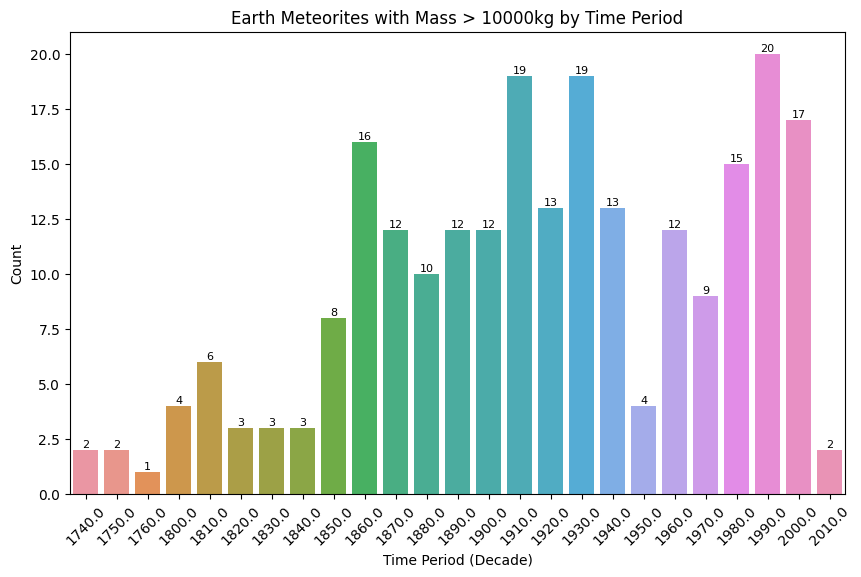

Earth Meteorites Before 2000:
        id       name    reclat    reclong      mass       year
0        1     Aachen  50.77500    6.08333      21.0 1880-01-01
1        2     Aarhus  56.18333   10.23333     720.0 1951-01-01
2        6       Abee  54.21667 -113.00000  107000.0 1952-01-01
3       10   Acapulco  16.88333  -99.90000    1914.0 1976-01-01
4      370    Achiras -33.16667  -64.95000     780.0 1902-01-01
..     ...        ...       ...        ...       ...        ...
994  24004   Timochin  54.50000   35.20000   65500.0 1807-01-01
995  24009   Tirupati  13.63333   79.41667     230.0 1934-01-01
997  24011      Tjabe  -7.08333  111.53333   20000.0 1869-01-01
998  24012   Tjerebon  -6.66667  106.58333   16500.0 1922-01-01
999  24019  Tomakovka  47.85000   34.76667     600.0 1905-01-01

[903 rows x 6 columns]
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Earth Meteorites Before 1970:
        id       name    re

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

# Read the CSV file into a DataFrame
df = pd.read_csv('meteorite_data.csv')
# print(df.columns)
# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], errors='coerce')
timestamp_2000 = pd.Timestamp(2000, 1, 1)
# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[(df['reclat'].notnull()) & (df['year'] < timestamp_2000)]

timestamp_1970 = pd.Timestamp(1970, 1, 1)

# Get all the Earth meteorites' coordinates that fell before the year 1970
earth_meteorites_before_1970 = df[(df['reclat'].notnull()) & (df['year'] < timestamp_1970)]

# Get all the Earth meteorites whose mass was more than 10000kg
earth_meteorites_mass_gt_10000kg = df[(df['reclat'].notnull()) & (df['mass'] > 10000)]

# Plotting the data

# Scatter plot of Earth meteorites before 2000



# Create a map centered around the Earth
map_2000 = folium.Map(location=[0, 0], zoom_start=.5)

# Add markers for Earth meteorites before 2000
for index, row in earth_meteorites_before_2000.iterrows():
    folium.CircleMarker(
        location=[row['reclat'], row['reclong']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=row['name']
    ).add_to(map_2000)

# Display the map
display(map_2000)

print("=====================================================================================================================")

# Create a map centered around the Earth
map_1970 = folium.Map(location=[0, 0], zoom_start=1)

# Add markers for Earth meteorites before 1970
for index, row in earth_meteorites_before_1970.iterrows():
    folium.Marker(
        location=[row['reclat'], row['reclong']],
        icon=folium.Icon(color='green', icon='circle', prefix='fa'),
        popup=row['name']
    ).add_to(map_1970)

# Display the map
display(map_1970)
print("=====================================================================================================================")

# Histogram of Earth meteorites with mass > 10000kg
mass_gt_10000kg_count = df[df['mass'] > 10000].groupby(df['year'].dt.year // 10 * 10).size();

plt.figure(figsize=(10, 6));
br_plt=sns.barplot(x=mass_gt_10000kg_count.index, y=mass_gt_10000kg_count.values);
plt.xlabel('Time Period (Decade)');
plt.ylabel('Count');
plt.title('Earth Meteorites with Mass > 10000kg by Time Period');
plt.xticks(rotation=45);
br_plt.bar_label(br_plt.containers[0], label_type='edge', fontsize=8);
plt.show();
print("=====================================================================================================================")

# Print the resulting dataframes
print("Earth Meteorites Before 2000:")
print(earth_meteorites_before_2000[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')

print("Earth Meteorites Before 1970:")
print(earth_meteorites_before_1970[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')

print("Earth Meteorites with Mass > 10000kg:")
print(earth_meteorites_mass_gt_10000kg[['id', 'name', 'reclat', 'reclong', 'mass', 'year']])
print(f'{"*-*-"*30}')


In [9]:
# !pip install folium

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('westworld_episodes.csv',encoding='latin_1')
# df.head()

import plotly.express as px

# Calculate the average ratings for each season
season_ratings = df.groupby('season')['average_rating'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(season_ratings, x='season', y='average_rating',
             color='average_rating', color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    title='Average Ratings for Each Season',
    xaxis_title='Season',
    yaxis_title='Average Rating',
    xaxis=dict(tickangle=0),
);
fig.update_traces(text=season_ratings['average_rating'].round(2), textposition='outside')

fig.show()

print("=====================================================================================================================")

# Filter episodes with average rating > 8 for each season
high_rated_episodes = df[df['average_rating'] > 8].groupby('season')['name'].unique()

# Print the high-rated episodes for each season
for season, episodes in high_rated_episodes.items():
    print(f"Season {season}:")
    for episode in episodes:
        print(f"- {episode}")
    print()

Season 1:
- Trompe L'Oeil
- The Well-Tempered Clavier
- The Bicameral Mind

Season 2:
- Kiksuya
- Vanishing Point
- The Passenger



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


link = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(link)
#df[~(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible')]

Q -2------------>
     VIN (1-10)    County       City State  Postal Code  Model Year   Make   
6   3FA6P0PU1G  Thurston   Tumwater    WA      98501.0        2016   FORD  \
7   WA1F2AFY8P  Thurston      Lacey    WA      98516.0        2023   AUDI   
8   1FADP5CU0E  Thurston  Rochester    WA      98579.0        2014   FORD   
11  7SAYGDEF4N    Yakima     Yakima    WA      98908.0        2022  TESLA   
14  1FADP5FU4H  Thurston      Lacey    WA      98513.0        2017   FORD   

      Model                   Electric Vehicle Type   
6    FUSION  Plug-in Hybrid Electric Vehicle (PHEV)  \
7      Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
8     C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
11  MODEL Y          Battery Electric Vehicle (BEV)   
14    C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range   
6               Not eligible due to low battery range              19  \
7               Not eligible due to low b

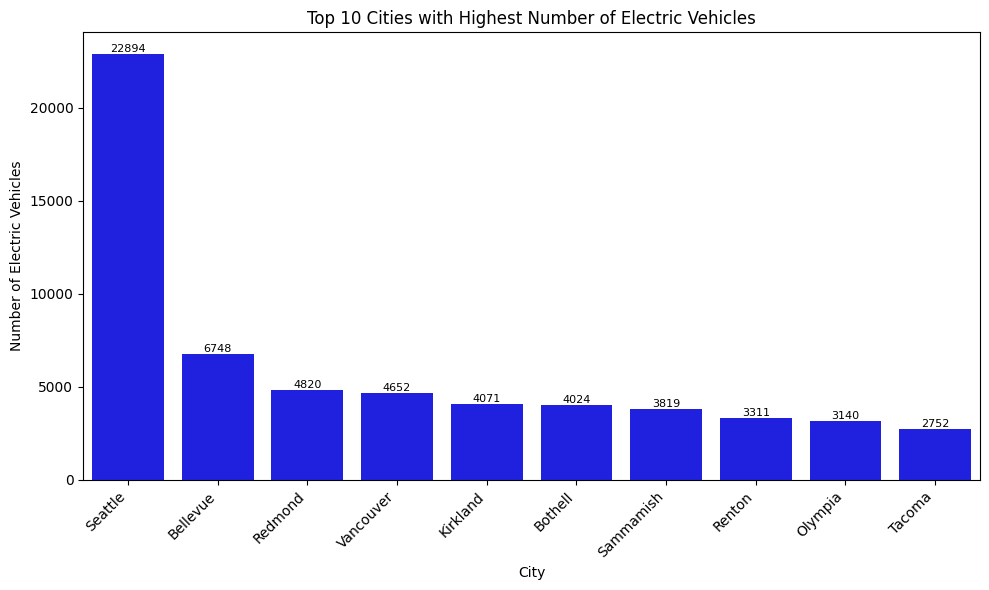

In [12]:
print('Q -2------------>\n',(df[~(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Clean Alternative Fuel Vehicle Eligible')]).head())
print('Q -2------------>\n',(df[(df['Make']=='TESLA') & (df['City']=='Bothell')][['Make','Model Year','Electric Vehicle Type']]).head())
# Filter the data for electric vehicles with electric range > 100 and made after 2015
print('Q -2------------>\n',(df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]).head())

# Get the top 10 cities with the highest number of electric vehicles
top_cities = df['City'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
fig= sns.barplot(x=top_cities.index, y=top_cities.values, color='blue')
fig.bar_label(fig.containers[0], label_type='edge', fontsize=8);
plt.title('Top 10 Cities with Highest Number of Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# fig.show()

In [15]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('123.csv')

# Clean the 'Coordinates' column by removing unwanted characters
data['Coordinates'] = data['Coordinates'].str.replace('[\(\)]', '', regex=True)

# Extract latitude and longitude from the 'Coordinates' column
data[['Latitude', 'Longitude']] = data['Coordinates'].str.split(', ', expand=True)

# Convert latitude and longitude to float
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

# Create a scatter plot on a world map
fig = px.scatter_geo(data, lat='Latitude', lon='Longitude', scope='world')

# Customize the plot
fig.update_layout(
    title='Geographic Distribution of Electric Vehicles',
    geo=dict(
        showland=True,
        landcolor='rgb(217, 217, 217)',
        coastlinecolor='rgb(243, 243, 243)',
        showocean=True,
        oceancolor='rgb(204, 255, 255)',
        showcountries=True,
        countrycolor='rgb(204, 204, 204)',
        showframe=True,
        framecolor='rgb(0, 0, 0)',
        projection=dict(type='natural earth')
    )
)

# Show the plot
fig.show()


Q-10 Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
Example Output -
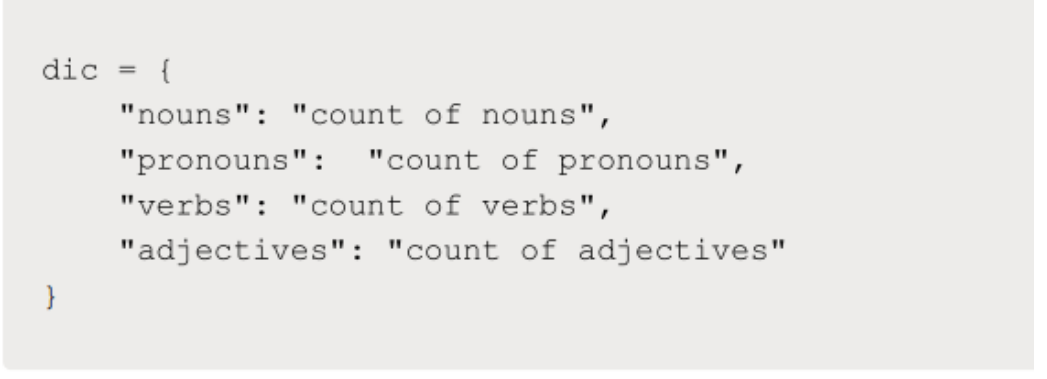

In [14]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

# Define the given phrase or paragraph
text = """
Lorem Ipsum is simply dummy text of the printing and typesetting industry. Lorem Ipsum has been the
industry's standard dummy text ever since the 1500s, when an unknown printer took a galley of type
and scrambled it to make a type specimen book. It has survived not only five centuries, but also 
the leap into electronic typesetting, remaining essentially unchanged. It was popularised in the 
1960s with the release of Letraset sheets containing Lorem Ipsum passages, 
and more recently with desktop publishing software like Aldus PageMaker including versions of Lorem Ipsum
"""

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Initialize count variables
verb_count = 0
noun_count = 0
pronoun_count = 0
adjective_count = 0

# Iterate through each sentence
for sentence in sentences:
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Perform POS tagging on the words
    tagged_words = pos_tag(words)
    print(tagged_words)
    
    # Iterate through each tagged word
    for word, tag in tagged_words:
        # Check the tag and increment the respective count variable
        if tag.startswith('V'):
            verb_count += 1
        elif tag.startswith('N'):
            noun_count += 1
        elif tag.startswith('PRP'):
            pronoun_count += 1
        elif tag.startswith('JJ'):
            adjective_count += 1

# Create a dictionary to store the counts
counts = {
    'verbs': verb_count,
    'nouns': noun_count,
    'pronouns': pronoun_count,
    'adjectives': adjective_count
}

# Print the count dictionary
print('\n\n',counts)


[('Lorem', 'NNP'), ('Ipsum', 'NNP'), ('is', 'VBZ'), ('simply', 'RB'), ('dummy', 'JJ'), ('text', 'NN'), ('of', 'IN'), ('the', 'DT'), ('printing', 'NN'), ('and', 'CC'), ('typesetting', 'NN'), ('industry', 'NN'), ('.', '.')]
[('Lorem', 'NNP'), ('Ipsum', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('the', 'DT'), ('industry', 'NN'), ("'s", 'POS'), ('standard', 'JJ'), ('dummy', 'NN'), ('text', 'NN'), ('ever', 'RB'), ('since', 'IN'), ('the', 'DT'), ('1500s', 'CD'), (',', ','), ('when', 'WRB'), ('an', 'DT'), ('unknown', 'JJ'), ('printer', 'NN'), ('took', 'VBD'), ('a', 'DT'), ('galley', 'NN'), ('of', 'IN'), ('type', 'NN'), ('and', 'CC'), ('scrambled', 'VBD'), ('it', 'PRP'), ('to', 'TO'), ('make', 'VB'), ('a', 'DT'), ('type', 'NN'), ('specimen', 'NNS'), ('book', 'NN'), ('.', '.')]
[('It', 'PRP'), ('has', 'VBZ'), ('survived', 'VBN'), ('not', 'RB'), ('only', 'RB'), ('five', 'CD'), ('centuries', 'NNS'), (',', ','), ('but', 'CC'), ('also', 'RB'), ('the', 'DT'), ('leap', 'NN'), ('into', 'IN'), ('electro

## Machine Learning

## Q1

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from wordcloud import WordCloud, STOPWORDS
import re
import plotly.express as px

from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')


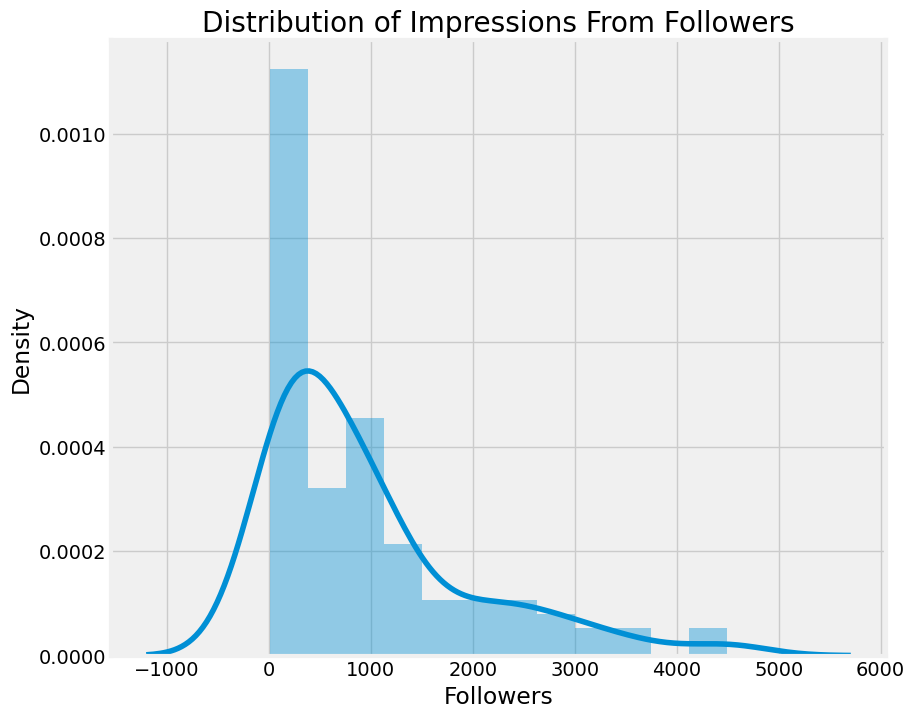

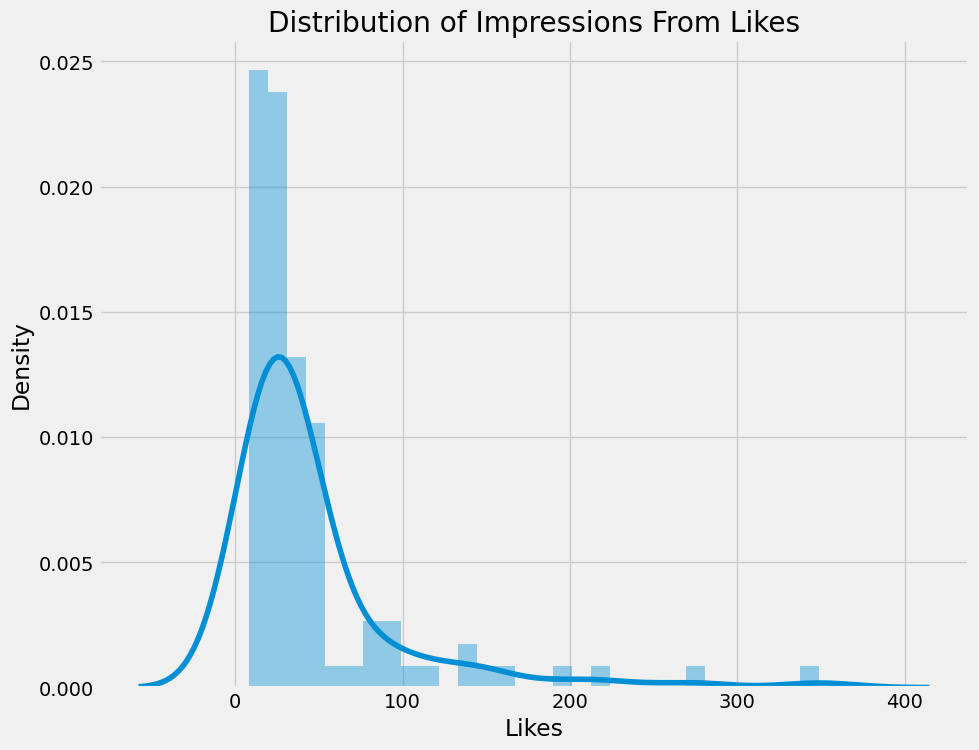

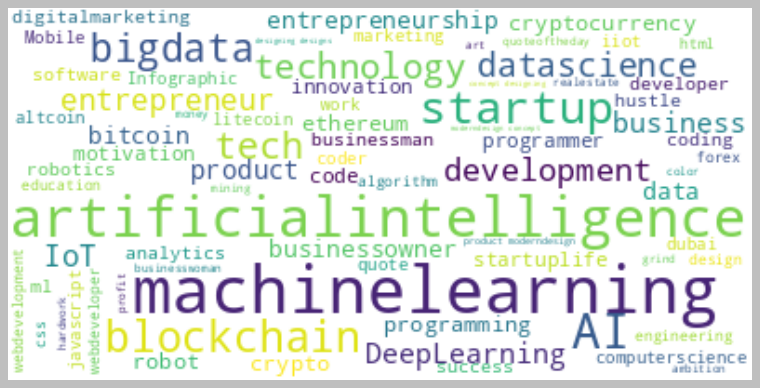

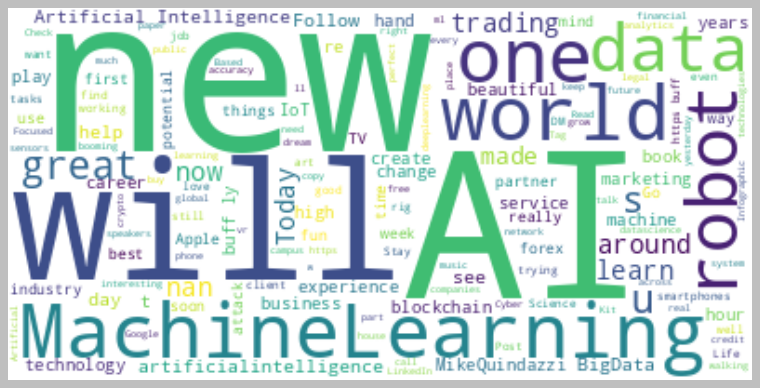

Mean Squared Error: 541.0121910944123
R^2 Score: 0.6183678779549548


In [22]:
# Read the dataset into a DataFrame
data = pd.read_csv('insta_reaches/instagram_reach.csv')
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)
data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(int)

############################################################################################################################################
############################################################################################################################################

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

############################################################################################################################################
############################################################################################################################################


plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

############################################################################################################################################
############################################################################################################################################


figure = px.scatter(data_frame = data, x="Likes",
                    y="Followers", trendline="ols", 
                    title = "Relationship Between Likes and Followers")
figure.show()


############################################################################################################################################
############################################################################################################################################

text = " ".join(str(i) for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


############################################################################################################################################
############################################################################################################################################


text = " ".join(str(i) for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


############################################################################################################################################
############################################################################################################################################
combined_features = data[['Followers','Time since posted']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['Likes'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)





In [23]:
combined_features = data[['Followers','Time since posted']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['Likes'], test_size=0.2, random_state=42)

# Train a linear regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


combined_features = data[['Followers','Time since posted']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['Likes'], test_size=0.2, random_state=42)

# Train a linear regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 391.82660999999996
R^2 Score: 0.723603972129491
Mean Squared Error: 206.05060610789786
R^2 Score: 0.8546510940935487


In [24]:
combined_features = data['Followers'].values
combined_features = combined_features.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data[['Time since posted','Likes']], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

combined_features = data['Followers'].values
combined_features = combined_features.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data[['Time since posted','Likes']], test_size=0.2, random_state=42)

# Train a linear regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Mean Squared Error: 600.1910747056277
R^2 Score: 0.09115915395107899
Mean Squared Error: 177.11660931944445
R^2 Score: 0.6771923573307359


In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset into a DataFrame
data = pd.read_csv('insta_reaches/instagram_reach.csv',index_col=0)


# Preprocess the hashtags
def preprocess_hashtags(hashtags):
    # Remove special characters and digits
    hashtags = re.sub(r'[^a-zA-Z\s]', '', hashtags)
    # Convert to lowercase
    hashtags = hashtags.lower()
    # Remove extra whitespaces
    hashtags = re.sub(r'\s+', ' ', hashtags).strip()
    
    return hashtags

data['Hashtags'] = data['Hashtags'].apply(preprocess_hashtags)

# Reset the index of the data DataFrame
data.reset_index(drop=True, inplace=True)

# Vectorize the hashtags using TF-IDF
vectorizer = TfidfVectorizer()
hashtag_features = vectorizer.fit_transform(data['Hashtags'])

# Convert hashtag_features to a DataFrame and set column names as strings
hashtag_df = pd.DataFrame(hashtag_features.toarray(), columns=[str(i) for i in range(hashtag_features.shape[1])])

# Combine the hashtag vectors with the 'Followers' column
combined_features = pd.concat([data['Followers'].reset_index(drop=True), hashtag_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['Likes'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1494.6533804407525
R^2 Score: -0.05433435824344013


In [26]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1602.0239100000001
R^2 Score: -0.13007395102027863


In [27]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1420.2609473969726
R^2 Score: -0.0018576441251121345


## Q 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal_encoder',
                                                  OrdinalEncoderTransformer(categories={'CAEC': ['no',
                                                                                                 'Sometimes',
                                                                                                 'Frequently',
                                                                                                 'Always'],
                                                                                        'CALC': ['no',
                                                                                                 'Sometimes',
                                                                                                 'Frequently',
                                                                                                 'Always']}),
                                                  ['CAEC', 'CALC']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('scaler', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('classifier', RandomForestClassifier())])

Accuracy:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 0.95>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


<Figure size 800x800 with 0 Axes>

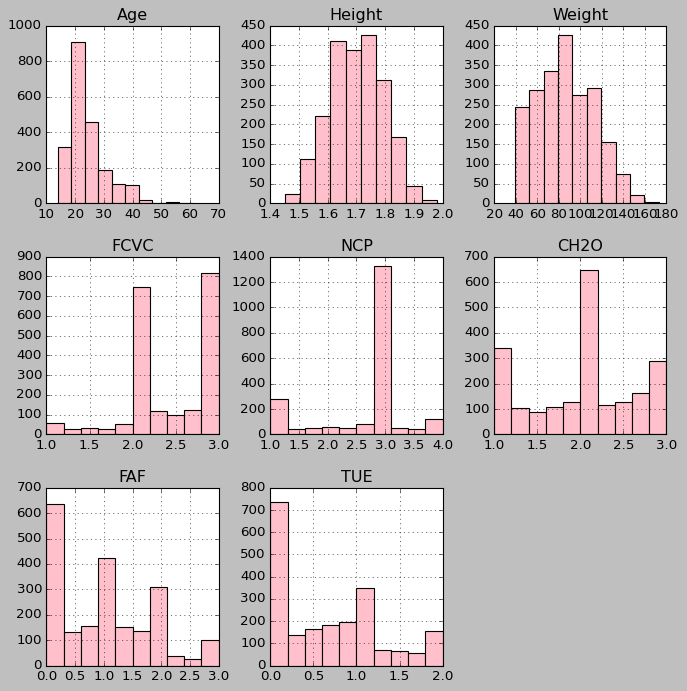

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,RobustScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('obesity_level/ObesityDataSet_raw_and_data_sinthetic.csv')
numerical_columns = df.select_dtypes(exclude='object').columns.to_list()
categorical_columns = df.select_dtypes(include='object').columns.to_list()
print(df.info())

plt.figure(figsize=(10,10))
df.hist(figsize=(10,10),color = 'pink');

fig = go.Figure()

# Create a histogram trace for each category in 'NObeyesdad'
for category in df['NObeyesdad'].unique():
    category_data = df[df['NObeyesdad'] == category]
    fig.add_trace(go.Histogram(x=category_data['Age'], name=category, histnorm='probability', nbinsx=17))

# Update layout
fig.update_layout(
    title='Histogram of Age with KDE by NObeyesdad',
    xaxis_title='Age',
    yaxis_title='Probability',
    bargap=0.1
)

fig.show()

feature_categories = categorical_columns.copy()
# Define the list of feature categories
feature_categories.remove('NObeyesdad')

# Loop through each feature category and create a chart
for feature in feature_categories:
    # Create a DataFrame for the feature category and target category
    data = df.groupby([feature, 'NObeyesdad']).size().reset_index(name='Count')

    
    
    # Create a grouped bar chart using Plotly Express
    fig = px.bar(data, x=feature, y='Count', color='NObeyesdad', barmode='group')

    # Customize the layout
    fig.update_layout(
        title=f"{feature} vs. Target Category",
        xaxis_title=feature,
        yaxis_title='Count',
        legend_title='Target Category'
    )

    # Show the chart
    fig.show()
categorical_columns.remove('CALC')
categorical_columns.remove('CAEC')
categorical_columns.remove('NObeyesdad')    
# Split the data into training and test sets
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create the column transformer
class OrdinalEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categories):
        self.categories = categories

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col, cats in self.categories.items():
            X_encoded[col] = X_encoded[col].map({cat: i for i, cat in enumerate(cats)})
        return X_encoded

# Define the categories for ordinal encoding
ordinal_categories = {
    'CAEC': ['no', 'Sometimes', 'Frequently', 'Always'],
    'CALC': ['no', 'Sometimes', 'Frequently', 'Always']
}

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoderTransformer(ordinal_categories), ['CAEC', 'CALC']),
        ('onehot_encoder', OneHotEncoder(drop='first'), categorical_columns),
        ('scaler', StandardScaler(), numerical_columns)
    ])
# Create the pipeline with preprocessor and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

display(pipeline)
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> {accuracy:.2f}>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from nltk.metrics.distance import edit_distance
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import random
import json


data = []
print('--------------')
file_path = 'newsdata/News_Category_Dataset_v3.json'
# Specify the path to your JSON file
with open(file_path, 'r') as json_file:
    for line in json_file:
        json_object = json.loads(line)
        data.append(json_object)
print('--------------')

# Process each JSON object
for json_object in data:
    link = json_object['link']
    headline = json_object['headline']
    category = json_object['category']
    short_description = json_object['short_description']
    authors = json_object['authors']
    date = json_object['date']

print('--------------')
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text
print('--------------')


# Get a random sample of 100 data from the list
data = random.sample(data, 5000)
print(len(data))
corpus = [clean_text(item['headline']) for item in data]

print('--------------')
print(corpus[:20])
vectorizer = TfidfVectorizer()

# Convert the corpus to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

target_headline = random.sample(corpus,1)
print(target_headline)

# Find the index of the target headline in the corpus
target_index = corpus.index(clean_text(target_headline[0]))
print(target_index)


# Compute pairwise cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix)
# Calculate cosine similarity with target headline
target_cosine_similarities = cosine_similarities[target_index]

# Calculate Jaccard similarity with target headline
target_jaccard_similarities = [1 - jaccard_distance(set(corpus[target_index].split()), set(corpus[i].split())) for i in range(len(corpus))]

# Calculate Levenshtein distance with target headline
target_levenshtein_distances = [edit_distance(corpus[target_index], corpus[i]) for i in range(len(corpus))]

# Calculate Euclidean distance with target headline
target_euclidean_distances = pairwise_distances(tfidf_matrix[target_index], tfidf_matrix, metric='euclidean')[0]

# Get the indices of the most similar headlines based on each similarity measure


most_similar_cosine_indices = np.array(target_cosine_similarities).argsort()[:-6:-1]
most_similar_jaccard_indices = np.array(target_jaccard_similarities).argsort()[:-6:-1]
most_similar_levenshtein_indices = np.array(target_levenshtein_distances).argsort()[:5]
most_similar_euclidean_indices = np.array(target_euclidean_distances).argsort()[:5]


# Get the most similar headlines
most_similar_cosine_headlines = [data[index]['headline'] for index in most_similar_cosine_indices]
most_similar_jaccard_headlines = [data[index]['headline'] for index in most_similar_jaccard_indices]
most_similar_levenshtein_headlines = [data[index]['headline'] for index in most_similar_levenshtein_indices]
most_similar_euclidean_headlines = [data[index]['headline'] for index in most_similar_euclidean_indices]

print("Cosine Similarity - Most Similar Headlines:")
for headline in most_similar_cosine_headlines:
    print("-", headline)

print("\nJaccard Similarity - Most Similar Headlines:")
for headline in most_similar_jaccard_headlines:
    print("-", headline)

print("\nLevenshtein Distance - Most Similar Headlines:")
for headline in most_similar_levenshtein_headlines:
    print("-", headline)

print("\nEuclidean Distance - Most Similar Headlines:")
for headline in most_similar_euclidean_headlines:
    print("-", headline)


--------------
--------------
--------------
--------------
5000
--------------
['wolf sheep clothing lgbtq oppression masquerade love non affirming christian campus', 'watch truck plow stolen car end reckless joyride', 'u airway passenger mutiny pilot kick blind man plane', 'best ever banana pancake', 'heath ledger joker diary surface footage german documentary series', 'supreme court temporarily spare bob mcdonnell prison', 'netflix documentary movie lgbtq experience', 'best barbecue grill restaurant', 'kevin addiction surely signal new revelation jack u', 'beautiful spa world photo', 'amid mass confusion homeland security secretary say u admit permanent resident deemed safe', 'natural way avoid cold flu', 'diagnosed bipolar disorder got', 'gorgeous brooklyn apartment something men woman agree photo', 'new york time devoting million covering donald trump', 'obama cancel debt owed defrauded profit college student', 'trump lot shipper want waive jones act help puerto rico', 'james cord

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset and split it into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to have a single channel (grayscale)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the first CNN architecture with a maximum of 8000 parameters
# model_1 = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
# Define the first CNN architecture with a total of 8000 trainable parameters
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.summary()

# Define the second CNN architecture with a total of 8000 trainable parameters
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.summary()


# Define the third CNN architecture with a total of 8000 trainable parameters
model_3 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(10, activation='softmax')
])
model_3.summary()



# Compile the model
model_1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_1.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
accuracy_1 = model_1.evaluate(x_test, y_test)[1]


# Compile the model
model_2.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_2.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
accuracy_2 = model_2.evaluate(x_test, y_test)[1]
# Compile the model
model_3.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_3.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
accuracy_3 = model_3.evaluate(x_test, y_test)[1]


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 8)         296       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 200)               0         
                                                                 
 dense_41 (Dense)            (None, 10)              

In [44]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_4.summary()

# Define the second CNN architecture with a total of 8000 trainable parameters
# This architecture uses three convolutional layers with 4, 8, and 16 filters, respectively, followed by a max pooling layer, a flatten layer, and a dense layer with 10 neurons.
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_5.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 8)         296       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 8)          0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 200)               0         
                                                                 
 dense_39 (Dense)            (None, 10)              

In [ ]:
# Create a comparison table
print("CNN Architecture\tAccuracy")
print("-------------------------------------------------")
print("Model 1\t\t", f"{accuracy_1 * 100:.2f}%")
print("Model 2\t\t", f"{accuracy_2 * 100:.2f}%")
print("Model 3\t\t", f"{accuracy_3 * 100:.2f}%")

In [8]:
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tqdm
# Set device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

# Define the first CNN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 32 * 32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 32 * 32)
        x = self.fc1(x)
        return x

# Create an instance of the model
model_1 = Net1().to(device)

# Define the optimizer and loss function
optimizer_1 = optim.SGD(model_1.parameters(), lr=0.001, momentum=0.9)
criterion_1 = nn.CrossEntropyLoss()

# Train the model
for epoch in range(10):
    model_1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_1.zero_grad()
        outputs = model_1(inputs)
        loss = criterion_1(outputs, labels)
        loss.backward()
        optimizer_1.step()
        running_loss += loss.item()
    print('Epoch {} loss: {:.3f}'.format(epoch + 1, running_loss / len(train_loader)))

# Evaluate the model
model_1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_1 = 100 * correct / total
print('Model 1 Accuracy: {:.2f}%'.format(accuracy_1))


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 loss: 1.864
Epoch 2 loss: 1.634
Epoch 3 loss: 1.514
Epoch 4 loss: 1.435
Epoch 5 loss: 1.381
Epoch 6 loss: 1.334
Epoch 7 loss: 1.290
Epoch 8 loss: 1.249
Epoch 9 loss: 1.218
Epoch 10 loss: 1.192
Model 1 Accuracy: 55.71%


In [4]:
# Define the second CNN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8 * 16 * 16, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 8 * 16 * 16)
        x = self.fc1(x)
        return x

# Create an instance of the model
model_2 = Net2().to(device)

# Define the optimizer and loss function
optimizer_2 = optim.SGD(model_2.parameters(), lr=0.001, momentum=0.9)
criterion_2 = nn.CrossEntropyLoss()

# Train the model
for epoch in range(10):
    model_2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_2.zero_grad()
        outputs = model_2(inputs)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Evaluate the model
model_2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_2 = 100 * correct / total
print('Model 2 Accuracy: %.2f%%' % accuracy_2)



Epoch 1 loss: 2.004
Epoch 2 loss: 1.774
Epoch 3 loss: 1.686
Epoch 4 loss: 1.606
Epoch 5 loss: 1.532
Epoch 6 loss: 1.477
Epoch 7 loss: 1.440
Epoch 8 loss: 1.415
Epoch 9 loss: 1.394
Epoch 10 loss: 1.376
Model 2 Accuracy: 50.69%


In [5]:
# Define the third CNN architecture
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the model
model_3 = Net3().to(device)

# Define the optimizer and loss function
optimizer_3 = optim.SGD(model_3.parameters(), lr=0.001, momentum=0.9)
criterion_3 = nn.CrossEntropyLoss()

# Train the model
for epoch in range(10):
    model_3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_3.zero_grad()
        outputs = model_3(inputs)
        loss = criterion_3(outputs, labels)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Evaluate the model
model_3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_3 = 100 * correct / total
print('Model 3 Accuracy: %.2f%%' % accuracy_3)



Epoch 1 loss: 2.301
Epoch 2 loss: 2.273
Epoch 3 loss: 2.085
Epoch 4 loss: 1.935
Epoch 5 loss: 1.830
Epoch 6 loss: 1.707
Epoch 7 loss: 1.619
Epoch 8 loss: 1.558
Epoch 9 loss: 1.509
Epoch 10 loss: 1.468
Model 3 Accuracy: 46.58%


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import tqdm

# Set device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

# class Net4(nn.Module):
#     def __init__(self):
#         super(Net4, self).__init__()
#         self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
#         self.bn1 = nn.BatchNorm2d(32)
#         self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
#         self.bn2 = nn.BatchNorm2d(32)
#         self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
#         self.bn3 = nn.BatchNorm2d(64)
#         self.fc1 = nn.Linear(4096, 128)  # Adjusted input size
#         self.fc2 = nn.Linear(128, 10)

#     def forward(self, x):
#         print(x.shape)  # Add this line to check the shape of the input tensor
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = x.view(x.size(0), -1)
#         print(x.shape)  # Add this line to check the shape before the fully connected layers
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

# # Create an instance of the model
# model_4 = Net4().to(device)

class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(4096, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        print(x.shape)  # Add this line to check the shape of the input tensor
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = x.view(128, 4096)
        print(x.shape)  # Add this line to check the shape before the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model_4 = Net4().to(device)

# Define the optimizer and loss function
optimizer_4 = optim.SGD(model_4.parameters(), lr=0.01, momentum=0.9)
criterion_4 = nn.CrossEntropyLoss()

# Train the model
for epoch in range(10):
    model_4.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        print(len(labels))
        optimizer_4.zero_grad()
        outputs = model_4(inputs)
        loss = criterion_4(outputs, labels)
        loss.backward()
        optimizer_4.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Evaluate the model
model_4.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_4 = 100 * correct / total
print('Model 4 Accuracy: %.2f%%' % accuracy_4)



Files already downloaded and verified
Files already downloaded and verified
128
torch.Size([128, 3, 32, 32])
torch.Size([128, 65536])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x65536 and 4096x128)

In [27]:
# Define the fifth CNN architecture
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 8 * 8, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(-1, 32 * 8 * 8)
        x = self.fc1(x)
        return x

# Create an instance of the model
model_5 = Net5().to(device)

# Define the optimizer and loss function
optimizer_5 = optim.SGD(model_5.parameters(), lr=0.001, momentum=0.9)
criterion_5 = nn.CrossEntropyLoss()

# Train the model
for epoch in range(10):
    model_5.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer_5.zero_grad()
        outputs = model_5(inputs)
        loss = criterion_5(outputs, labels)
        loss.backward()
        optimizer_5.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

# Evaluate the model
model_5.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model_5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_5 = 100 * correct / total
print('Model 5 Accuracy: %.2f%%' % accuracy_5)


Files already downloaded and verified
Files already downloaded and verified


ValueError: Expected input batch_size (2048) to match target batch_size (128).

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
from albumentations import Compose, Resize
import torch
from torch.utils.data import Dataset
import cv2
from albumentations.pytorch import ToTensorV2
import multiprocessing
from torch.utils.data import Dataset

# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the path to the directory containing the images
dataset_dir = "vegetables/Vegetable Images"

# Define the classes
classes = [
    "Bean", "Bitter_Gourd", "Bottle_Gourd", "Brinjal", "Broccoli", "Cabbage",
    "Capsicum", "Carrot", "Cauliflower", "Cucumber", "Papaya", "Potato",
    "Pumpkin", "Radish", "Tomato"
]



# class VegetableDataset(Dataset):
#     def __init__(self, data, labels, transform=None):
#         self.data = data
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         image = self.data[index]
#         label = self.labels[index]

#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

#         if self.transform:
#             augmented = self.transform(image=image)
#             image = augmented["image"]

#         return image, label
# class VegetableDataset(Dataset):
#     def __init__(self, data, labels, transform=None):
#         self.data = data
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         image = self.data[index]
#         label = self.labels[index]

#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

#         if self.transform:
#             augmented = self.transform(image=image)
#             image = augmented["image"]

#         # Convert image tensor to Byte data type
#         image = image.byte()

#         return image, label


class VegetableDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image = self.data[index]
        label = self.labels[index]

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

        # Convert image tensor to Byte data type
        image = image.astype(np.float32) / 255.0

        if self.transform:
            augmented = self.transform(image=image)
            image = augmented["image"]

        return image, label



if __name__ == '__main__':
    multiprocessing.freeze_support()

    # Initialize lists to store the data and labels
    train_data = []
    train_labels = []
    val_data = []
    val_labels = []

    # Loop through each class and load the train images
    for class_name in classes:
        train_class_dir = os.path.join(dataset_dir, "train", class_name)
        for image_file in os.listdir(train_class_dir):
            image_path = os.path.join(train_class_dir, image_file)

            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize the image to (224, 224)

            # Append the image and label to the train lists
            train_data.append(image)
            train_labels.append(class_name)

    # Loop through each class and load the validation images
    for class_name in classes:
        val_class_dir = os.path.join(dataset_dir, "validation", class_name)
        for image_file in os.listdir(val_class_dir):
            image_path = os.path.join(val_class_dir, image_file)

            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize the image to (224, 224)

            # Append the image and label to the validation lists
            val_data.append(image)
            val_labels.append(class_name)

    # Convert the lists to numpy arrays
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    val_data = np.array(val_data)
    val_labels = np.array(val_labels)

    # Perform label encoding on the class labels
    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_labels)
    val_labels = label_encoder.transform(val_labels)

    # Define the transformations
    train_transform = Compose([
        Resize(256, 256),  # Resize the image to (256, 256)
        ToTensorV2()  # Convert the image to a tensor
    ])

    val_transform = Compose([
        Resize(256, 256),  # Resize the image to (256, 256)
        ToTensorV2()  # Convert the image to a tensor
    ])

    # Create the dataset instances
    train_dataset = VegetableDataset(train_data, train_labels, transform=train_transform)
    val_dataset = VegetableDataset(val_data, val_labels, transform=val_transform)

    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=8)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=8)

    # Define the model architecture
    model = models.resnet50(pretrained=True)
    num_features = model.fc.in_features
    num_classes = len(classes)
    model.fc = nn.Linear(num_features, num_classes)

    # Move the model to the appropriate device
    model = model.to(device)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 10

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        # Calculate average training loss for the epoch
        train_loss = running_loss / len(train_dataset)

        # Validate the model
        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100.0 * correct / total

        print(f"Epoch {epoch+1}/{num_epochs}: Training Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Load the test images
    test_data = []
    test_labels = []

    # Loop through each class and load the test images
    for class_name in classes:
        test_class_dir = os.path.join(dataset_dir, "test", class_name)
        for image_file in os.listdir(test_class_dir):
            image_path = os.path.join(test_class_dir, image_file)

            # Read and resize the image
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize the image to (224, 224)

            # Append the image and label to the test lists
            test_data.append(image)
            test_labels.append(class_name)

    # Convert the test lists to numpy arrays
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)

    # Perform label encoding on the test labels
    test_labels = label_encoder.transform(test_labels)

    # Create the test dataset
    test_dataset = VegetableDataset(test_data, test_labels, transform=val_transform)

    # Create the test data loader
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=8)

    # Test the model on the test set
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100.0 * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Save the trained model
    torch.save(model.state_dict(), "vegetable_model.pth")
